# 1. Install Dependencies and Setup

In [10]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-hf2zk522\tensorflow-gpu_ccef604e098d4315889953fae77fd64c\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

# 2. Collect Images

In [11]:
pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
albumentations               1.4.3
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.1
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup               1.2.0
executing                    2.0


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 16

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

##  Annotate Images with LabelMe

In [23]:
!labelme

Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\Scripts\labelme.exe\__main__.py", line 4, in <module>
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\labelme\__init__.py", line 6, in <module>
    from qtpy import QT_VERSION
  File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\qtpy\__init__.py", line 287, in <module>
    raise QtBindingsNotFoundError from None
qtpy.QtBindingsNotFoundError: No Qt bindings could be found


# Create Dataset

In [4]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

### 2.3 Load Image into TF Data Pipeline

In [3]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [4]:
images.as_numpy_iterator().next()

b'data\\images\\0fec652a-f844-11ee-8855-bc6ee2baa279.jpg'

In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images = images.map(load_image)

In [7]:
images.as_numpy_iterator().next()

array([[[107, 181, 194],
        [ 98, 174, 187],
        [ 90, 170, 181],
        ...,
        [101, 168, 174],
        [104, 169, 175],
        [103, 168, 174]],

       [[104, 178, 191],
        [ 98, 174, 187],
        [ 92, 172, 183],
        ...,
        [ 99, 166, 172],
        [100, 167, 173],
        [100, 167, 173]],

       [[ 98, 174, 187],
        [ 97, 175, 187],
        [ 94, 174, 185],
        ...,
        [ 95, 164, 169],
        [ 96, 165, 172],
        [ 97, 166, 173]],

       ...,

       [[ 60, 139, 143],
        [ 60, 139, 143],
        [ 60, 139, 143],
        ...,
        [ 33,  52,  46],
        [ 35,  54,  48],
        [ 40,  59,  53]],

       [[ 61, 142, 145],
        [ 60, 141, 144],
        [ 59, 140, 143],
        ...,
        [ 31,  52,  45],
        [ 33,  52,  46],
        [ 35,  54,  48]],

       [[ 62, 143, 146],
        [ 60, 141, 144],
        [ 58, 139, 142],
        ...,
        [ 31,  52,  45],
        [ 32,  51,  45],
        [ 34,  53,  47]]

In [8]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [10]:
image_generator = images.batch(4).as_numpy_iterator()

In [22]:
plot_images = image_generator.next()

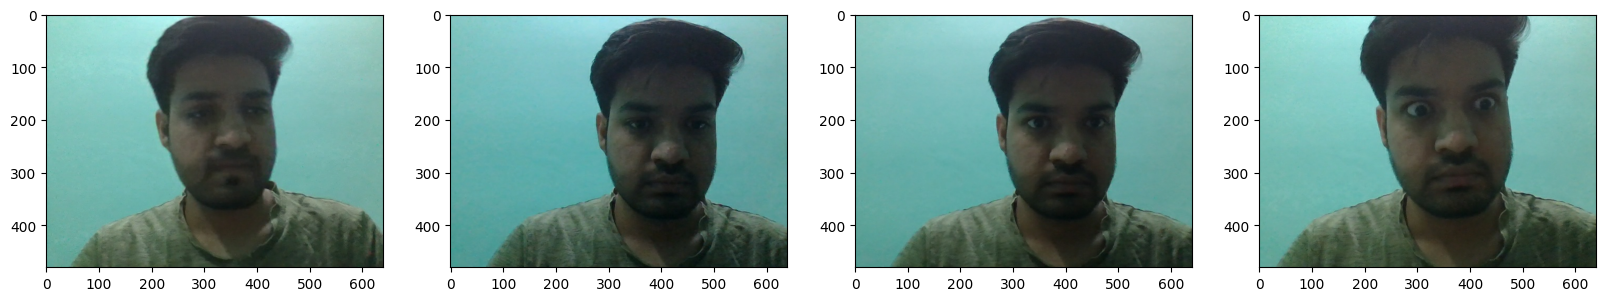

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [30]:
80*0.8  # 64 train

64.0

In [31]:
80*0.1  # 8 and 8 for test and val

8.0

### 3.2 Move the Matching Labels

In [5]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   

#### note images shape now is (480, 640, 3)== (rows,col,.)==(height,width,.)

In [38]:
img=cv2.imread(os.path.join('data','train','images','0fec652a-f844-11ee-8855-bc6ee2baa279.jpg'))

In [39]:
with open(os.path.join('data', 'train', 'labels', '0fec652a-f844-11ee-8855-bc6ee2baa279.json'), 'r') as f:
    label = json.load(f)

In [45]:
label['shapes'][0]

{'label': 'LeftEye',
 'points': [[316.94444444444446, 210.55555555555557]],
 'group_id': None,
 'description': '',
 'shape_type': 'point',
 'flags': {},
 'mask': None}

## 5. Image Augmentation

In [7]:
import albumentations as alb

In [8]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                        keypoint_params=alb.KeypointParams(format='xy', label_fields=['class_labels']))

In [9]:
for partition in ['train', 'test', 'val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        classes = [0,0]
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
    
            if label['shapes'][0]['label']=='LeftEye': 
                classes[0] = 1
                coords[0] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[1] = np.squeeze(label['shapes'][0]['points'])[1]

            if label['shapes'][0]['label']=='RightEye':
                classes[1] = 1
                coords[2] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[3] = np.squeeze(label['shapes'][0]['points'])[1]

            if len(label['shapes']) > 1:     
                if label['shapes'][1]['label'] =='LeftEye': 
                    classes[0] = 1 
                    coords[0] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[1] = np.squeeze(label['shapes'][1]['points'])[1]

                if label['shapes'][1]['label'] =='RightEye': 
                    classes[1] = 1
                    coords[2] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[3] = np.squeeze(label['shapes'][1]['points'])[1]
            
            np.divide(coords, [640,480,640,480])  # now converted from pascal_voc to alumentations
                
        try: 
            for x in range(120):
                keypoints = [(coords[:2]), (coords[2:])]
                augmented = augmentor(image=img, keypoints=keypoints, class_labels=['LeftEye','RightEye'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image
                annotation['class'] = [0,0]
                annotation['keypoints'] = [0,0,0,0]

                if os.path.exists(label_path):
                    if len(augmented['keypoints']) > 0: 
                        for idx, cl in enumerate(augmented['class_labels']):
                            if cl == 'LeftEye': 
                                annotation['class'][0] = 1 
                                annotation['keypoints'][0] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][1] = augmented['keypoints'][idx][1]
                            if cl == 'RightEye': 
                                annotation['class'][1] = 1 
                                annotation['keypoints'][2] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][3] = augmented['keypoints'][idx][1]
                                
                annotation['keypoints'] = list(np.divide(annotation['keypoints'], [450,450,450,450]))


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)